# Automatic Evaluator

### Requirements

In [1]:
%%capture
!pip install ipywidgets
!pip install widgetsnbextension

import ipywidgets as widgets
from pathlib import Path

## Model Upload

In [2]:
uploader = widgets.Text(
    value='model.gz',
    placeholder='Model Path',
    description="Model Path:",
    disabled=False  
)
display(uploader)

Text(value='model.gz', description='Model Path:', placeholder='Model Path')

In [14]:
model_path = uploader.value
model_path

'C:\\Users\\savos\\Desktop\\master_courses\\Practical AI Lab\\HackAtari\\models\\atari_DQN_modern_Pong_0_model_50000000_dqn.gz'

## Game Selection

In [15]:
games = [x.name.replace('.py', '') for x in Path('../hackatari/games').glob('**/*') if x.is_file() and x.name != '__init__.py']

game_selector = widgets.Select(
    options = games,
    value = "pong",
    description = 'Game:',
    disabled = False,
)
display(game_selector)

Select(description='Game:', index=21, options=('amidar', 'assault', 'asterix', 'atlantis', 'bankheist', 'boxin…

In [16]:
selected_game = game_selector.value

# Run Game

In [ ]:
print(f"Running Game: {selected_game} with model located at: {model_path}")

!pip install -e ..

Running Game: pong with model located at: C:\Users\savos\Desktop\master_courses\Practical AI Lab\HackAtari\models\atari_DQN_modern_Pong_0_model_50000000_dqn.gz
Obtaining file:///C:/Users/savos/Desktop/master_courses/Practical%20AI%20Lab/HackAtari/hackatari



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: file:///C:/Users/savos/Desktop/master_courses/Practical%20AI%20Lab/HackAtari/hackatari does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
model_path = "./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz"
selected_game = "Pong"
modifications = ["No HUD", "Modified Reward Function", "Increased Difficulty"] # TODO: Some random ones, should be changed to the actual modifications

# Evaluation

In [90]:
# Execute an eval.py script with the selected game and model
!python ./scripts/eval.py -e 3 -g {selected_game} -a {model_path} {model_path} -lf ./logs.json

Loaded agent from ./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz
Episode 1: Reward = -1.0, Time = 4.37 seconds with 2699 steps and actions: {0: 544, 1: 88, 2: 241, 3: 1153, 4: 144, 5: 529}
Episode 2: Reward = -6.0, Time = 4.05 seconds with 2497 steps and actions: {0: 507, 1: 67, 2: 202, 3: 979, 4: 136, 5: 606}
Episode 3: Reward = -14.0, Time = 2.73 seconds with 1720 steps and actions: {0: 309, 1: 50, 2: 142, 3: 661, 4: 90, 5: 468}
Episode 4: Reward = -1.0, Time = 4.22 seconds with 2607 steps and actions: {0: 486, 1: 96, 2: 225, 3: 1257, 4: 89, 5: 454}
Episode 5: Reward = -1.0, Time = 4.15 seconds with 2600 steps and actions: {0: 481, 1: 65, 2: 207, 3: 1133, 4: 116, 5: 598}
Episode 6: Reward = -8.0, Time = 3.06 seconds with 1952 steps and actions: {0: 383, 1: 68, 2: 160, 3: 826, 4: 77, 5: 438}
Episode 7: Reward = 13.0, Time = 3.89 seconds with 2368 steps and actions: {0: 546, 1: 64, 2: 192, 3: 895, 4: 97, 5: 574}
Episode 8: Reward = -1.0, Time = 4.61 seconds with 2843 steps and 

A.L.E: Arcade Learning Environment (version 0.10.2+c9d4b19)
[Powered by Stella]


In [91]:
# For eval script to work properly (imports are importing properly), we need to make the scripts folder
# as the main folder
scripts_dir = os.path.abspath(os.path.join(os.getcwd(), 'scripts'))
sys.path.append(scripts_dir)

import os
import sys
from eval import decompress_log_data, read_log_data

# Load the logs
decompress_log_data("./logs_comp.gz", "./logs.json")
logs = read_log_data("./logs.json")


# Logs are a list of dictionaries, where each dictionary is a log entry of one episode
# Structure of the dictionary:
analyze_json_structure(logs[0])
len(logs)


agent_path: str
current_episodes_rewards: list
  list[2699]
current_episodes_times: list
  list[2699]
current_episodes_actions: list
  list[2699]


18

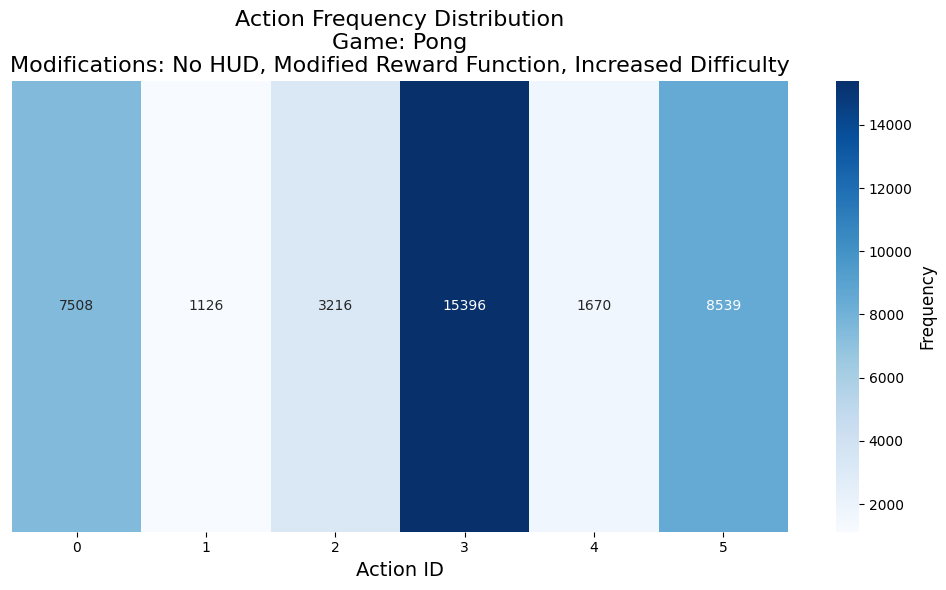

## Action Frequency Heatmap

This heatmap represents the frequency of actions taken by the agent across all evaluation episodes.

### Key Insights:
- **Total Actions:** 37455 actions taken across all episodes
- **Most Frequent Action:** Action ID `3` with `15396` occurrences
- **Least Frequent Action:** Action ID `1` with `1126` occurrences

### Game Information:
- **Game:** Pong
- **Modifications:** No HUD, Modified Reward Function, Increased Difficulty
- **Model Path:** `./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz`


In [92]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

def action_distribution_heatmap(action_logs, selected_game, model_path, modifications):
    """
    Generate a heatmap of action frequencies and display Markdown insights.
    
    :param action_logs: List of actions taken during evaluation episodes.
    :param selected_game: Name of the game being evaluated.
    :param model_path: Path to the trained model being evaluated.
    :param modifications: List of modifications applied to the environment.
    """
    # Count actions across all episodes
    action_counts = defaultdict(int)
    for episode in action_logs:
        for action in episode:
            action_counts[action] += 1
            
    actions, counts = zip(*sorted(action_counts.items()))
    
    # Create heatmap
    plt.figure(figsize=(10, 6))
    hm = sns.heatmap([counts], annot=True, fmt="d", xticklabels=actions, yticklabels=False, cmap="Blues")
    
    plt.title(f"Action Frequency Distribution\nGame: {selected_game}\nModifications: {', '.join(modifications)}", fontsize=16)
    plt.xlabel("Action ID", fontsize=14)
    
    # Add colorbar label
    cbar = hm.collections[0].colorbar
    cbar.set_label('Frequency', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Generate and display Markdown description
    description = generate_heatmap_description(action_counts, selected_game, model_path, modifications)
    display(Markdown(description))


def generate_heatmap_description(action_counts, selected_game, model_path, modifications) -> str:
    """
    Generate a dynamic Markdown description for the heatmap.
    
    :param action_counts: Dictionary of action frequencies.
    :param selected_game: Name of the game being evaluated.
    :param model_path: Path to the trained model being evaluated.
    :param modifications: List of modifications applied to the environment.
    :return: Markdown formatted text describing the heatmap and insights.
    """
    total_actions = sum(action_counts.values())
    most_frequent_action = max(action_counts, key=action_counts.get)
    least_frequent_action = min(action_counts, key=action_counts.get)
    
    description = f"""## Action Frequency Heatmap

This heatmap represents the frequency of actions taken by the agent across all evaluation episodes.

### Key Insights:
- **Total Actions:** {total_actions} actions taken across all episodes
- **Most Frequent Action:** Action ID `{most_frequent_action}` with `{action_counts[most_frequent_action]}` occurrences
- **Least Frequent Action:** Action ID `{least_frequent_action}` with `{action_counts[least_frequent_action]}` occurrences

### Game Information:
- **Game:** {selected_game}
- **Modifications:** {', '.join(modifications) if modifications else "None"}
- **Model Path:** `{model_path}`
"""
    
    return description


# Example usage:
actions = [episode['current_episodes_actions'] for episode in logs]
selected_game = "Pong"
model_path = "./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz"
modifications = ["No HUD", "Modified Reward Function", "Increased Difficulty"]

action_distribution_heatmap(actions, selected_game, model_path, modifications)


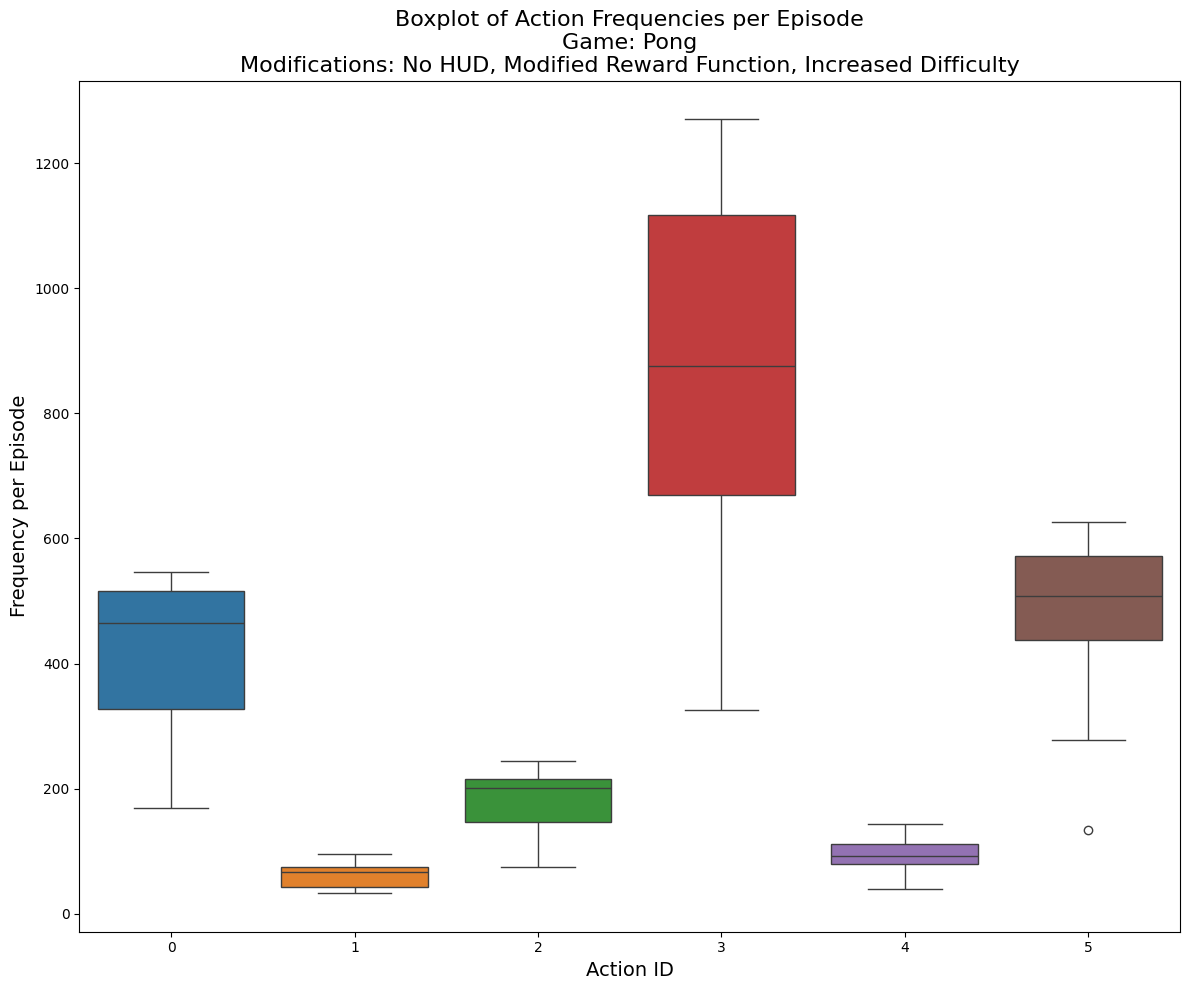

## Action Distribution Analysis

This boxplot represents the frequency of actions taken by the agent per episode.

### Key Insights:
- **Total Actions:** 37455 actions taken across all episodes
- **Most Frequent Action:** Action ID `3` was taken most frequently overall
- **Least Frequent Action:** Action ID `1` was taken least frequently
- **Highest Variability:** Action ID `3` shows the most variance across episodes

### Game Information:
- **Game:** Pong
- **Modifications:** No HUD, Modified Reward Function, Increased Difficulty
- **Model Path:** `./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz`


In [93]:
from collections import defaultdict
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

def plot_action_distribution_box(action_logs, action_space, selected_game, model_path, modifications):
    # Collect counts for each action per episode.
    counts = defaultdict(list)
    for episode in action_logs:
        episode_counts = [0] * len(action_space)
        for action in episode:
            episode_counts[action] += 1
        for i, count in enumerate(episode_counts):
            counts[i].append(count)
    
    # Create a DataFrame with each column representing an action.
    df = pd.DataFrame(counts)

    # Create the boxplot
    plt.figure(figsize=(12, 10))  # Increase figure height to make room for text
    sns.boxplot(data=df)

    # Format modifications as a comma-separated string
    modifications_str = ", ".join(modifications) if modifications else "None"

    # Add title and axis labels
    plt.title(f"Boxplot of Action Frequencies per Episode\nGame: {selected_game}\nModifications: {modifications_str}", fontsize=16)
    plt.xlabel("Action ID", fontsize=14)
    plt.ylabel("Frequency per Episode", fontsize=14)

    # Adjust layout to leave space at the bottom for the text
    plt.tight_layout()  
    plt.show()

    description = generate_dynamic_description(df, model_path)
    display(Markdown(description))


def generate_dynamic_description(df, model_path) -> str:
    """
    Generate a dynamic Markdown description based on the boxplot data.
    
    :param df: DataFrame containing frequency counts for each action per episode.
    :param model_path: Path to the trained model being evaluated.
    :return: Markdown formatted text describing the plot and insights.
    """
    total_actions = df.sum().sum()
    most_frequent_action = df.sum().idxmax()
    least_frequent_action = df.sum().idxmin()
    
    variability = df.std().idxmax()
    
    description = f"""## Action Distribution Analysis

This boxplot represents the frequency of actions taken by the agent per episode.

### Key Insights:
- **Total Actions:** {total_actions} actions taken across all episodes
- **Most Frequent Action:** Action ID `{most_frequent_action}` was taken most frequently overall
- **Least Frequent Action:** Action ID `{least_frequent_action}` was taken least frequently
- **Highest Variability:** Action ID `{variability}` shows the most variance across episodes

### Game Information:
- **Game:** {selected_game}
- **Modifications:** {', '.join(modifications) if modifications else "None"}
- **Model Path:** `{model_path}`
"""
    
    return description


actions = [episode['current_episodes_actions'] for episode in logs]
action_space = []
for episode in logs:
    episode = episode['current_episodes_actions']
    for action in episode:
        if action not in action_space:
            action_space.append(action)



plot_action_distribution_box(actions, action_space, selected_game, model_path, modifications)


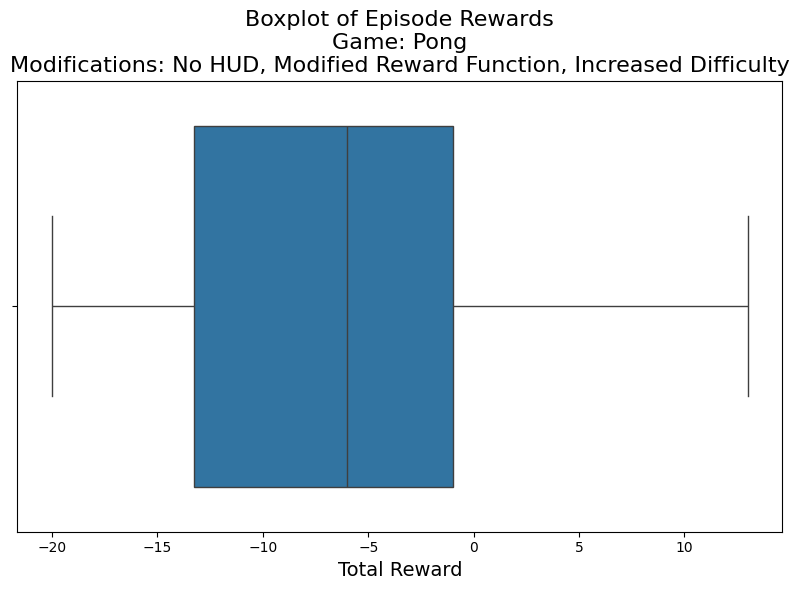

## Reward Distribution Analysis

This visualization represents the distribution of total rewards achieved by the agent across all evaluation episodes.

### Key Insights:
- **Total Episodes:** 18
- **Average Reward:** -7.06
- **Maximum Reward:** 13.0
- **Minimum Reward:** -20.0

### Game Information:
- **Game:** Pong
- **Modifications:** No HUD, Modified Reward Function, Increased Difficulty
- **Model Path:** `./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz`


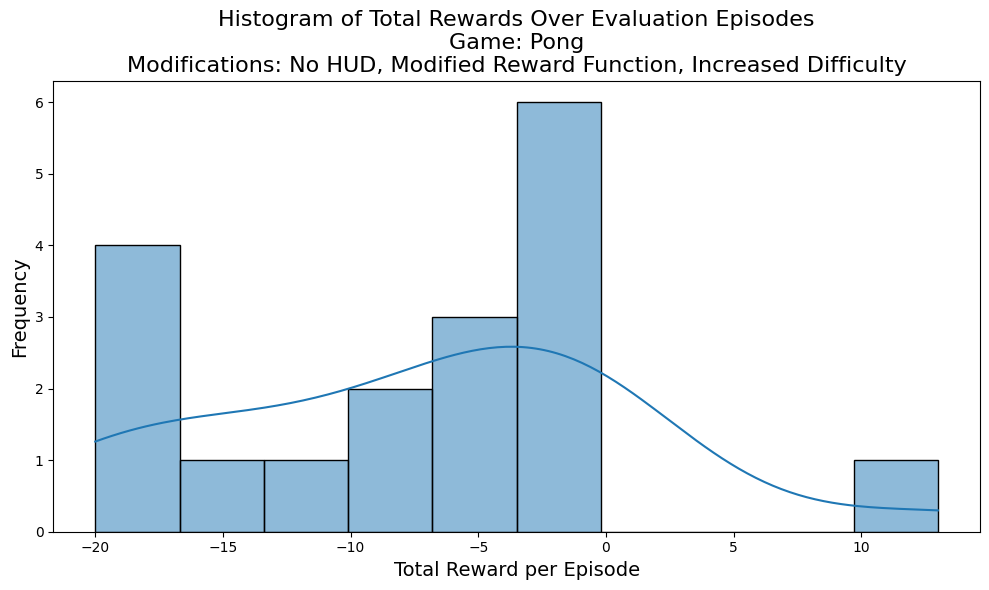

## Reward Distribution Analysis

This visualization represents the distribution of total rewards achieved by the agent across all evaluation episodes.

### Key Insights:
- **Total Episodes:** 18
- **Average Reward:** -7.06
- **Maximum Reward:** 13.0
- **Minimum Reward:** -20.0

### Game Information:
- **Game:** Pong
- **Modifications:** No HUD, Modified Reward Function, Increased Difficulty
- **Model Path:** `./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz`


In [94]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

def plot_reward_distribution(episode_rewards, selected_game, model_path, modifications):
    """
    Generate a histogram of total rewards over evaluation episodes and display Markdown insights.
    
    :param episode_rewards: List of total rewards per episode.
    :param selected_game: Name of the game being evaluated.
    :param model_path: Path to the trained model being evaluated.
    :param modifications: List of modifications applied to the environment.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(episode_rewards, kde=True, bins=10)
    plt.title(f"Histogram of Total Rewards Over Evaluation Episodes\nGame: {selected_game}\nModifications: {', '.join(modifications)}", fontsize=16)
    plt.xlabel("Total Reward per Episode", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Generate and display Markdown description
    description = generate_reward_description(episode_rewards, selected_game, model_path, modifications)
    display(Markdown(description))


def plot_reward_boxplot(episode_rewards, selected_game, model_path, modifications):
    """
    Generate a boxplot of total rewards per episode and display Markdown insights.
    
    :param episode_rewards: List of total rewards per episode.
    :param selected_game: Name of the game being evaluated.
    :param model_path: Path to the trained model being evaluated.
    :param modifications: List of modifications applied to the environment.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=episode_rewards)
    plt.title(f"Boxplot of Episode Rewards\nGame: {selected_game}\nModifications: {', '.join(modifications)}", fontsize=16)
    plt.xlabel("Total Reward", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Generate and display Markdown description
    description = generate_reward_description(episode_rewards, selected_game, model_path, modifications)
    display(Markdown(description))


def generate_reward_description(episode_rewards, selected_game, model_path, modifications) -> str:
    """
    Generate a dynamic Markdown description for reward distribution visualizations.
    
    :param episode_rewards: List of total rewards per episode.
    :param selected_game: Name of the game being evaluated.
    :param model_path: Path to the trained model being evaluated.
    :param modifications: List of modifications applied to the environment.
    :return: Markdown formatted text describing the reward distribution and insights.
    """
    total_episodes = len(episode_rewards)
    avg_reward = sum(episode_rewards) / total_episodes
    max_reward = max(episode_rewards)
    min_reward = min(episode_rewards)

    description = f"""## Reward Distribution Analysis

This visualization represents the distribution of total rewards achieved by the agent across all evaluation episodes.

### Key Insights:
- **Total Episodes:** {total_episodes}
- **Average Reward:** {avg_reward:.2f}
- **Maximum Reward:** {max_reward}
- **Minimum Reward:** {min_reward}

### Game Information:
- **Game:** {selected_game}
- **Modifications:** {', '.join(modifications) if modifications else "None"}
- **Model Path:** `{model_path}`
"""
    
    return description


# Example usage:
rewards = [sum(episode['current_episodes_rewards']) for episode in logs]
selected_game = "Pong"
model_path = "./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz"
modifications = ["No HUD", "Modified Reward Function", "Increased Difficulty"]

plot_reward_boxplot(rewards, selected_game, model_path, modifications)
plot_reward_distribution(rewards, selected_game, model_path, modifications)


In [104]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from IPython.display import Markdown, display
# import pandas as pd

# def plot_reward_action_correlation(action_logs, rewards, action_space, selected_game, model_path, modifications):
#     """
#     Plot correlation between rewards and dominant actions taken during evaluation episodes.
    
#     :param action_logs: List of actions taken per episode.
#     :param rewards: List of total rewards per episode.
#     :param action_space: List of all possible actions.
#     :param selected_game: Name of the game being evaluated.
#     :param model_path: Path to the trained model being evaluated.
#     :param modifications: List of modifications applied to the environment.
#     """
#     # Identify dominant actions in each episode (most frequently taken action)
#     dominant_actions = [max(set(episode), key=episode.count) for episode in action_logs]
    
#     # Group rewards by dominant actions
#     reward_by_action = {action: [] for action in action_space}
#     for i, dominant_action in enumerate(dominant_actions):
#         reward_by_action[dominant_action].append(rewards[i])
    
#     # Compute average reward per dominant action
#     avg_rewards = {action: sum(rewards) / len(rewards) if rewards else 0 for action, rewards in reward_by_action.items()}
    
#     # Convert data to a DataFrame for plotting
#     avg_rewards_df = pd.DataFrame({
#         "Action ID": list(avg_rewards.keys()),
#         "Average Reward": list(avg_rewards.values())
#     })
    
#     # Bar chart of average rewards by dominant actions with explicit hue assignment
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=avg_rewards_df, x="Action ID", y="Average Reward", hue="Action ID", palette="viridis", dodge=False)
    
#     plt.title(f"Reward-Action Correlation\nGame: {selected_game}\nModifications: {', '.join(modifications)}", fontsize=16)
#     plt.xlabel("Dominant Action ID", fontsize=14)
#     plt.ylabel("Average Reward", fontsize=14)
#     plt.tight_layout()
#     plt.show()
    
#     # Generate and display Markdown description
#     description = generate_reward_action_description(avg_rewards, selected_game, model_path, modifications)
#     display(Markdown(description))


# def generate_reward_action_description(avg_rewards, selected_game, model_path, modifications) -> str:
#     """
#     Generate a dynamic Markdown description for reward-action correlation visualization.
    
#     :param avg_rewards: Dictionary mapping actions to average rewards.
#     :param selected_game: Name of the game being evaluated.
#     :param model_path: Path to the trained model being evaluated.
#     :param modifications: List of modifications applied to the environment.
#     :return: Markdown formatted text describing the reward-action correlation and insights.
#     """
#     highest_reward_action = max(avg_rewards, key=avg_rewards.get)
#     lowest_reward_action = min(avg_rewards, key=avg_rewards.get)

#     description = f"""## Reward-Action Correlation Analysis

# This visualization highlights the relationship between dominant actions and average rewards achieved during evaluation episodes.

# ### Key Insights:
# - **Highest Reward Action:** Action ID `{highest_reward_action}` with an average reward of `{avg_rewards[highest_reward_action]:.2f}`
# - **Lowest Reward Action:** Action ID `{lowest_reward_action}` with an average reward of `{avg_rewards[lowest_reward_action]:.2f}`
# - **Action Variability:** Rewards vary significantly across different dominant actions.

# ### Game Information:
# - **Game:** {selected_game}
# - **Modifications:** {', '.join(modifications) if modifications else "None"}
# - **Model Path:** `{model_path}`
# """
    
#     return description


# # Example usage:
# actions = [episode['current_episodes_actions'] for episode in logs]
# rewards = [sum(episode['current_episodes_rewards']) for episode in logs]
# action_space = [0, 1, 2, 3, 4, 5]  # Example action IDs
# selected_game = "Pong"
# model_path = "./models/atari_DQN_modern_Pong_0_model_50000000_dqn.gz"
# modifications = ["No HUD", "Modified Reward Function", "Increased Difficulty"]

# plot_reward_action_correlation(actions, rewards, action_space, selected_game, model_path, modifications)


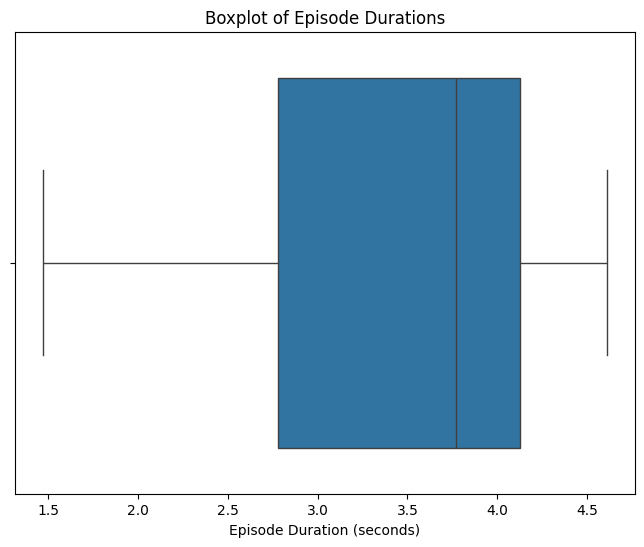

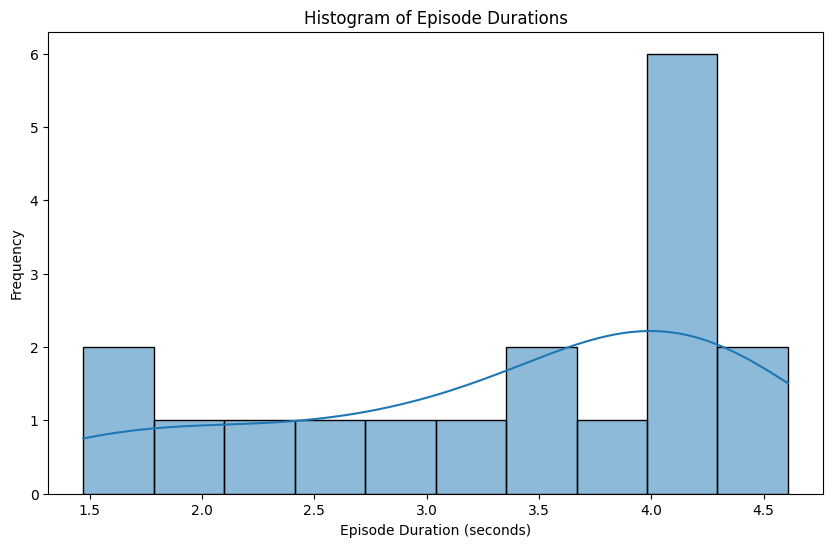

In [106]:
import numpy as np

def plot_time_distribution(episode_times):
    plt.figure(figsize=(10, 6))
    sns.histplot(episode_times, kde=True, bins=10)
    plt.title("Histogram of Episode Durations")
    plt.xlabel("Episode Duration (seconds)")
    plt.ylabel("Frequency")
    plt.show()

def plot_time_boxplot(episode_times):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=episode_times)
    plt.title("Boxplot of Episode Durations")
    plt.xlabel("Episode Duration (seconds)")
    plt.show()

times = [np.sum(episode['current_episodes_times']) for episode in logs]
plot_time_boxplot(times)
plot_time_distribution(times)




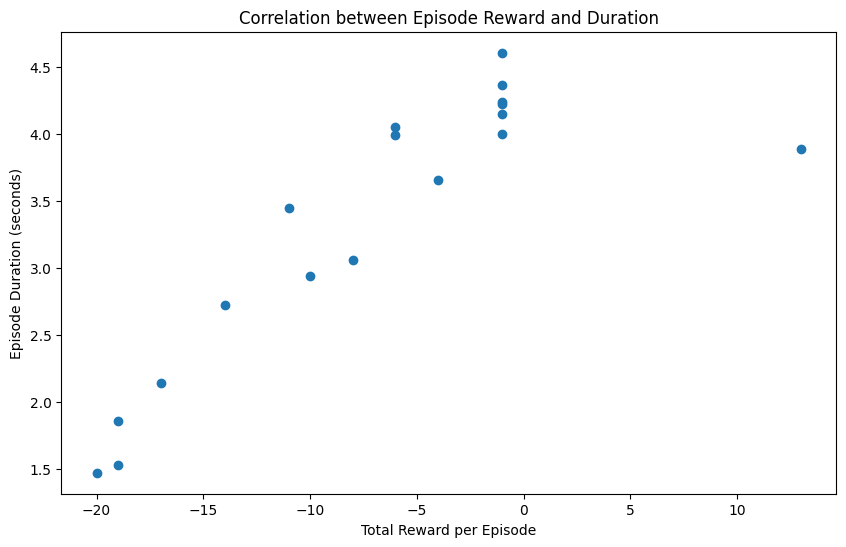

In [96]:
def plot_reward_vs_time(episode_rewards, episode_times):
    plt.figure(figsize=(10, 6))
    plt.scatter(episode_rewards, episode_times)
    plt.title("Correlation between Episode Reward and Duration")
    plt.xlabel("Total Reward per Episode")
    plt.ylabel("Episode Duration (seconds)")
    plt.show()

plot_reward_vs_time(rewards, times)